In [82]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
DATA_PATH = os.path.join(os.getcwd(), 'names')

In [84]:
def get_dict_with_df(list_of_years):
    dict_of_data_frame = {}
    for year in list_of_years:
        names = pd.read_csv(os.path.join(DATA_PATH, 'yob' + str(year) + '.txt'), names = ['Name', 'Gender', 'Count']) 
        dict_of_data_frame[year] = names
    return dict_of_data_frame

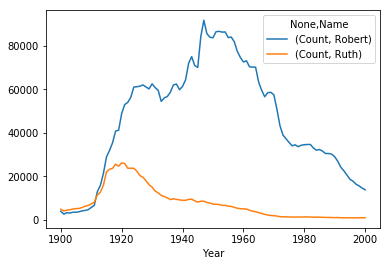

In [85]:
names_for_1900_2000 = pd.concat(get_dict_with_df(range(1900, 2001)), names = ['Year', 'Pos'])
names_for_1900_2000.query('Name == ["Ruth", "Robert"]').groupby(['Name','Year']).sum().unstack('Name').plot()

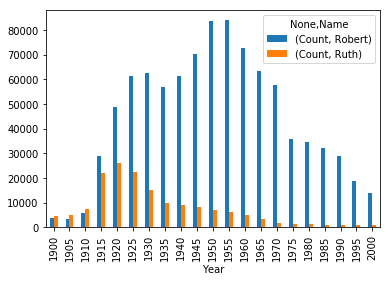

In [86]:
names_for_1900_2000_with_5 = pd.concat(get_dict_with_df(range(1900, 2001, 5)), names = ['Year', 'Pos'])
names_for_1900_2000_with_5.query('Name == ["Ruth", "Robert"]').groupby(['Name', 'Year']).sum().unstack('Name').plot.bar()

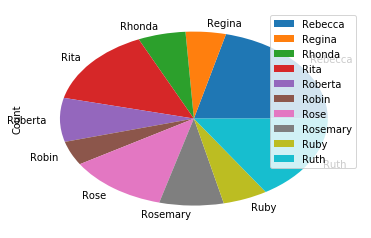

In [87]:
names_1950 = pd.concat(get_dict_with_df([1950]), names = ['Year', 'Pos'])
names_1950[names_1950.Name.str.startswith('R')].head(10).groupby('Name').sum().plot.pie(y = 'Count')

In [88]:
def get_quantity_consonants(row):
    consonants = 0
    for i in row.Name:
        letter = i.lower()
        if letter != "a" and letter != "e" and letter != "i" and letter != "o" and letter != "u" and letter != "y":      
            consonants += 1         
    return consonants

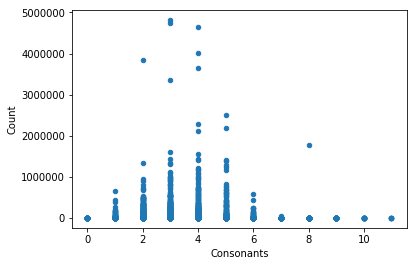

In [89]:
names_for_1900_2000 = pd.concat(get_dict_with_df(range(1900, 2001)), names = ['Year', 'Pos'])
names_for_1900_2000 = names_for_1900_2000.groupby('Name').sum().reset_index()
names_for_1900_2000['Consonants'] = names_for_1900_2000.apply(get_quantity_consonants, axis = 1)
names_for_1900_2000.plot.scatter(x = 'Consonants', y = 'Count')